<center><h1>In your face:<br>Biased judgement of fear-anger expressions in violence offenders.</h1></center>

# 1. Questionnaire Data

This is an anlaysis of the [AFAS](http://www.researchgate.net/publication/270567168_Combat_high_or_traumatic_stress_Violent_offending_is_associated_with_appetitive_aggression_but_not_with_symptoms_of_traumatic_stress), PPI-R and SCID-II scores of the participants.  

### import modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

import os
import fnmatch

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from myBasics import *

In [2]:
# Sebastian Raschka; https://github.com/rasbt/watermark/blob/master/docs/watermark.ipynb
%load_ext watermark
%watermark -v -m -d -u -p numpy,scipy,sklearn,pandas,matplotlib,seaborn -g

last updated: 2017-04-22 

CPython 2.7.9
IPython 5.3.0

numpy 1.12.1
scipy 0.19.0
sklearn 0.18.1
pandas 0.19.2
matplotlib 2.0.0
seaborn 0.7.1

compiler   : GCC 4.9.2
system     : Linux
release    : 3.16.0-4-amd64
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit
Git hash   : b8121bec24b05956ce8732a407e4cd9a156ee323


# AFAS

### Overview of the questions the AFAS contains

In [3]:
for entry in open('../experiment/quest/app/forms.py','r'):
    if 'u"' in entry:
        print entry[entry.find('u"')+2:-3]

1. Traten Sie aus Frust einen Gegenstand oder warfen ihn umher?
2. Fanden Sie Sportarten aufregender, in denen Blut floss?
3. Waren Sie so gereizt, dass Sie sich an anderen Menschen abreagierten?
4. Wollten Sie jemanden noch mehr einschüchtern, wenn Sie merkten, dass diese Person Angst vor Ihnen hatte?
5. Schlugen Sie aus Ärger so fest auf den Tisch, dass Ihnen die Faust danach weh tat?
6. Wollten Sie möglichst vor Ort sein, wenn Sie von einem grausamen Ereignis hörten?
7. Provozierten Sie andere, einfach weil es Ihnen Spaß machte?
8. Wenn Sie wütend auf jemanden waren, malten Sie sich schlimme Dinge aus, die der betreffenden Person zustoßen könnten?
9. Schauten Sie einer Schlägerei zu, auch wenn Sie sich selbst dabei in Gefahr gebracht haben?
10. Rutschte Ihnen die Hand aus, weil jemand Sie provozierte?
11. Machte es Ihnen Spaß, sich zu prügeln?
12. Wenn Sie sich bedroht fühlten, ging es Ihnen besser, wenn Sie sich vorstellten der betreffenden Person zu schaden?
13. Gewöhnten Sie sich

### find all files

In [4]:
def get_logfile(whichfolder, whichexperiment):

    loglist = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichexperiment):
            loglist.append(whichfolder+fileName)
    return loglist

In [5]:
loglist = get_logfile('../experiment/quest/app/static/logfiles/','log*.txt')
loglist.sort()

Example:

In [6]:
loglist[:5]

['../experiment/quest/app/static/logfiles/logfile_A1.txt',
 '../experiment/quest/app/static/logfiles/logfile_A10.txt',
 '../experiment/quest/app/static/logfiles/logfile_A11.txt',
 '../experiment/quest/app/static/logfiles/logfile_A12.txt',
 '../experiment/quest/app/static/logfiles/logfile_A13.txt']

### get data of one participant

In [7]:
def makeThis(logfile):

    pName = logfile[logfile.find('_')+1:logfile.rfind('.')]
    pName = pName[0] + ('000'+ pName[1:])[-3:]
    
    fullDf = pd.read_csv(logfile,
                         skiprows=2,
                         index_col=[0]
                        )
    
    fullDf.index = [[pName]*len(fullDf.index),fullDf.index]
    fullDf.index.names = ['id', 'f']
    fullDf.columns = ['ans']
    
    withinDf = fullDf.unstack(1)
    
    # sort columns
    newCols = []
    for entry in withinDf.columns.levels[1]:
        newName = '00'+str(entry[1:])
        newCols.append('f'+newName[-3:])
    withinDf.columns = newCols
    withinDf = withinDf.reindex_axis(sorted(withinDf.columns), axis=1)
    
    return withinDf

Example:

In [8]:
makeThis(loglist[-1])

,f001,f002,f003,f004,f005,f006,f007,f008,f009,f010,...,f021,f022,f023,f024,f025,f026,f027,f028,f029,f030
id,,,,,,,,,,,,,,,,,,,,,
K009,1,0,0,2,0,0,0,1,1,1,...,1,0,1,0,1,0,1,0,1,1


### get data of all participants

In [9]:
def makeAll(loglist):
    
    for p in loglist:
        thisDf = makeThis(p)
        try:
            bigDf = pd.concat([bigDf,thisDf])
            
        except:
            bigDf = thisDf
    
    group = [a[0] for a in bigDf.index]
    
    bigDf.index = [group,bigDf.index]
    bigDf = bigDf.sort_index(axis=0,level=1)
    
    return bigDf

In [10]:
bigDf = makeAll(loglist)

The final DataFrame:

In [11]:
bigDf.head()

f001  f002  f003  f004  f005  f006  f007  f008  f009  f010  ...   \
  id                                                                ...    
A A001     1     0     1     0     1     0     0     0     0     1  ...    
  A002     1     0     0     0     1     0     1     0     0     0  ...    
  A003     2     0     0     0     1     0     1     0     1     1  ...    
  A004     0     0     0     1     0     0     2     1     0     0  ...    
  A005     3     0     1     3     2     3     1     4     4     0  ...    

        f021  f022  f023  f024  f025  f026  f027  f028  f029  f030  
  id                                                                
A A001     1     0     2     0     0     1     1     0     2     0  
  A002     0     0     1     0     0     0     0     0     0     0  
  A003     1     0     1     0     0     0     0     0     0     2  
  A004     0     0     1     0     0     0     1     0     0     0  
  A005     0     0     1     0     0     3     1     1     2     3  

[5 rows x 30 columns]

### Export as CSV for re-use

In [12]:
bigDf.to_csv('../outputs/fullAFAS.csv')

Example of re-importing:

In [13]:
pd.read_csv('../outputs/fullAFAS.csv',
            index_col =[0,1]).head()

f001  f002  f003  f004  f005  f006  f007  f008  f009  f010  ...   \
  id                                                                ...    
A A001     1     0     1     0     1     0     0     0     0     1  ...    
  A002     1     0     0     0     1     0     1     0     0     0  ...    
  A003     2     0     0     0     1     0     1     0     1     1  ...    
  A004     0     0     0     1     0     0     2     1     0     0  ...    
  A005     3     0     1     3     2     3     1     4     4     0  ...    

        f021  f022  f023  f024  f025  f026  f027  f028  f029  f030  
  id                                                                
A A001     1     0     2     0     0     1     1     0     2     0  
  A002     0     0     1     0     0     0     0     0     0     0  
  A003     1     0     1     0     0     0     0     0     0     2  
  A004     0     0     1     0     0     0     1     0     0     0  
  A005     0     0     1     0     0     3     1     1     2     3  

[5 rows x 30 columns]

## Get avarage scores for each participant

Facilitative Aggression:
Items 1,3,5,8,10,12,14,17,19,21,23,25,27,29,30

Appetitive Aggression:
Items 2,4,6,7,9,11,13,15,16,18,20,22,24,26,28


In [14]:
fAgr=np.array([1,3,5,8,10,12,14,17,19,21,23,25,27,29,30])-1 # because we start counting from zero, we subtract 1
aAgr=np.array([2,4,6,7,9,11,13,15,16,18,20,22,24,26,28])-1

print fAgr
print aAgr

[ 0  2  4  7  9 11 13 16 18 20 22 24 26 28 29]
[ 1  3  5  6  8 10 12 14 15 17 19 21 23 25 27]


Example: facilitative aggression

In [15]:
bigDf[bigDf.columns[fAgr]].head()

f001  f003  f005  f008  f010  f012  f014  f017  f019  f021  f023  \
  id                                                                       
A A001     1     1     1     0     1     2     1     1     1     1     2   
  A002     1     0     1     0     0     0     0     0     1     0     1   
  A003     2     0     1     0     1     1     0     0     0     1     1   
  A004     0     0     0     1     0     0     0     1     0     0     1   
  A005     3     1     2     4     0     3     0     1     0     0     1   

        f025  f027  f029  f030  
  id                            
A A001     0     1     2     0  
  A002     0     0     0     0  
  A003     0     0     0     2  
  A004     0     1     0     0  
  A005     0     1     2     3

In [16]:
def makeMean(df,fAgr=fAgr,aAgr=aAgr,labelCoding=labelCoding):
    # get the mean on both scales
    meanF = df[df.columns[fAgr]].T.mean()
    meanA = df[df.columns[aAgr]].T.mean()
    # get the overall mean
    meanBig = df.T.mean()
    
    assert meanBig.all() == ((meanA+meanF)/2.).all() , 'mean values corrupted; please check'
    
    # put them in one df
    meanDf = pd.DataFrame([meanF,meanA,meanBig]).T
    # structure the df
    meanDf['group'] = [ labelCoding[x[0]] for x in meanDf.index.levels[1] ]
    meanDf.columns = ['Facilitative','Appetitive','Overall','group']
    meanDf = meanDf.sort_index()
   
    return meanDf

In [17]:
meanDf = makeMean(bigDf)

In [18]:
meanDf.head()

Facilitative  Appetitive   Overall  group
  id                                             
A A001      1.000000    0.266667  0.633333      2
  A002      0.266667    0.066667  0.166667      2
  A003      0.600000    0.200000  0.400000      2
  A004      0.266667    0.200000  0.233333      2
  A005      1.400000    1.200000  1.300000      2

### Save for re-use:

In [19]:
meanDf.to_csv('../outputs/meanAFAS.csv')

## Plot of the results

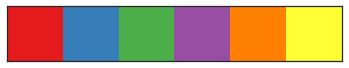

In [20]:
sns.palplot(myPal)

In [21]:
sortDf = meanDf.sort_values('group')

In [22]:
sortDf.tail()

Facilitative  Appetitive   Overall  group
  id                                             
A A014      1.000000    0.533333  0.766667      2
  A015      0.200000    0.066667  0.133333      2
  A016      0.133333    0.200000  0.166667      2
  A010      0.600000    0.200000  0.400000      2
  A001      1.000000    0.266667  0.633333      2

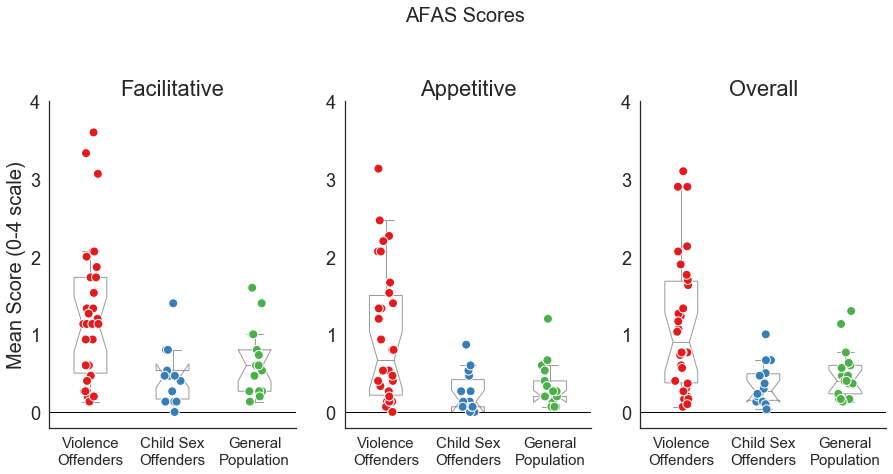

In [23]:
fig = plt.figure(figsize=(15,6))

for i,metric in enumerate(meanDf.columns[:-1]):
    
    ax = fig.add_subplot(int('13'+str(i+1)))

    sns.boxplot(x='group',y=metric,data=sortDf,
                width=0.4,linewidth=1,color='white',whis=True,notch=True,fliersize=0,ax=ax)

    sns.stripplot(x='group', y=metric, data=sortDf,
                  jitter=True, edgecolor='white',palette=myPal,size=9,linewidth=1,ax=ax)

    ax.axhline(0,color='k',linewidth=1)
    ax.set_title(metric)
    
    ax.set_xticklabels(['Violence\nOffenders','Child Sex\nOffenders','General\nPopulation'],fontsize=15)
    #ax.set_xticks(range(3),['Violence\nOffenders','Child Sex\nOffenders','General\nPopulation'])
    ax.set_xlabel('')
    if i ==  0: 
        ax.set_ylabel('Mean Score (0-4 scale)')
    else:
        ax.set_ylabel('')
    ax.set_ylim(-0.2,4)
    sns.despine()
    
plt.suptitle('AFAS Scores',fontsize=20, position=(0.51,1.1))
# save to file
plt.savefig('../figures/afasFig.png',dpi=300) 
# show in notebook
plt.show()

### Inferential statistics

In [24]:
def makeUTests(df):
    bigDf = pd.DataFrame()
    d = {}
    for comp in [('G','K'),('G','A'),('K','A')]:
        for variable in df.columns[:-1]:
            group1 = df.ix[comp[0]][variable]
            group2 = df.ix[comp[1]][variable]
            U,p = stats.mannwhitneyu(group1,group2,alternative='two-sided')
            if p<0.05:
                thisSig = '*'
            else:
                thisSig = 'n.s.'
            d[variable] = {'U':round(U,2),'p':round(p,3),'sig':thisSig}
        thisDf = pd.DataFrame(d)
        thisDf = thisDf.reindex_axis(['U','p','sig'], axis=0)
        thisDf.index = [ [comp[0]+' > '+comp[1]]*len(thisDf.index),thisDf.index ]

        bigDf = pd.concat([bigDf,thisDf])
    return bigDf.T

In [25]:
makeUTests(meanDf)

G > K             G > A            K > A             
                  U      p sig      U      p sig     U      p   sig
Appetitive    322.5  0.005   *    360   0.02   *    90  0.253  n.s.
Facilitative    329  0.003   *  357.5  0.024   *    80  0.125  n.s.
Overall         331  0.002   *  362.5  0.018   *    89  0.241  n.s.

### Investigating how the subscales correlate with other

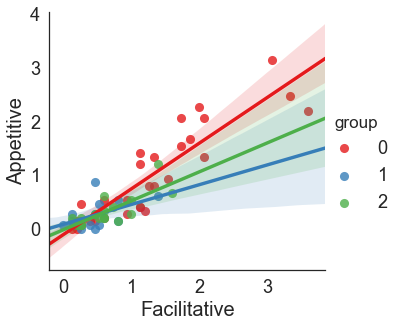

In [26]:
# Draw a categorical scatterplot to show each observation
sns.lmplot(x="Facilitative", y="Appetitive", hue="group", data=sortDf,palette=myPal);

In [27]:
meanDf.groupby("group").describe().T[[1,2,9,10,17,18]]

group                0                   1                   2          
                  mean       std      mean       std      mean       std
Appetitive    0.964444  0.874103  0.252381  0.265611  0.329412  0.288165
Facilitative  1.264444  0.924504  0.466667  0.361384  0.650980  0.411319
Overall       1.114444  0.876893  0.359524  0.272744  0.490196  0.329723

# PPI-R

In [28]:
ppiDf = pd.read_csv('../experiment/ppi_r.csv',
                   index_col=[0,1])

ppiDf['group'] = [ labelCoding[x[0]] for x in ppiDf.index.levels[1]]
ppiDf = ppiDf.replace(-99,np.nan)
ppiDf = ppiDf.dropna()
ppiDf = ppiDf

In [29]:
ppiDf.head()

Blame externalization  Rebellious nonconformity  Stress immunity  \
g id                                                                       
A A001                   18.0                      57.0             46.0   
  A002                   22.0                      41.0             46.0   
  A003                   34.0                      56.0             37.0   
  A004                   19.0                      46.0             51.0   
  A005                   45.0                      82.0             37.0   

        Social influence  Coldheartedness  Machiavellian egocentricity  \
g id                                                                     
A A001              53.0             27.0                         35.0   
  A002              46.0             30.0                         32.0   
  A003              46.0             32.0                         31.0   
  A004              34.0             38.0                         32.0   
  A005              37.0             37.0                         46.0   

        Carefree nonplanfulness  Fearlessness  Sum PPI-R  Insincere Answers  \
g id                                                                          
A A001                     24.0          25.0      285.0                 53   
  A002                     30.0           9.0      256.0                 43   
  A003                     30.0          24.0      290.0                 41   
  A004                     22.0          18.0      260.0                 47   
  A005                     38.0          27.0      349.0                 31   

        group  
g id           
A A001      2  
  A002      2  
  A003      2  
  A004      2  
  A005      2

In [30]:
ppiDf.to_csv('../outputs/ppiDf.csv')

In [31]:
def makeBoxPlot(df):
    fig = plt.figure(figsize=(15,8))

    sortDf = df.sort_values('group')
    
    myColumns = df.columns[:-1]
    numColumns = len(myColumns)
    
    for i,metric in enumerate(myColumns):

        ax = fig.add_subplot(2,numColumns/2.,i+1)

        sns.boxplot(x='group',y=metric,data=sortDf,
                    width=0.4,linewidth=1,color='white',whis=True,notch=True,fliersize=0,ax=ax)

        sns.stripplot(x='group', y=metric, data=sortDf,
                      jitter=True, edgecolor='white',palette=myPal,ax=ax)

        ax.set_title(metric,fontsize=15)

        ax.set_xticklabels(['Violence\nOffenders','Child Sex\nOffenders','General\nPopulation'],fontsize=9)
        ax.set_xlabel('')
        if i%5 ==  0: 
            ax.set_ylabel('Sum Score',fontsize=15)
        else:
            ax.set_ylabel('')
        #ax.set_ylim(-0.2,4)
        sns.despine()

    plt.suptitle('PPI-R Scores',fontsize=20, position=(0.51,1.02))
    # save to file
    #plt.savefig('../figures/afasFig.png',dpi=300) 
    # show in notebook
    plt.tight_layout()
    plt.show()

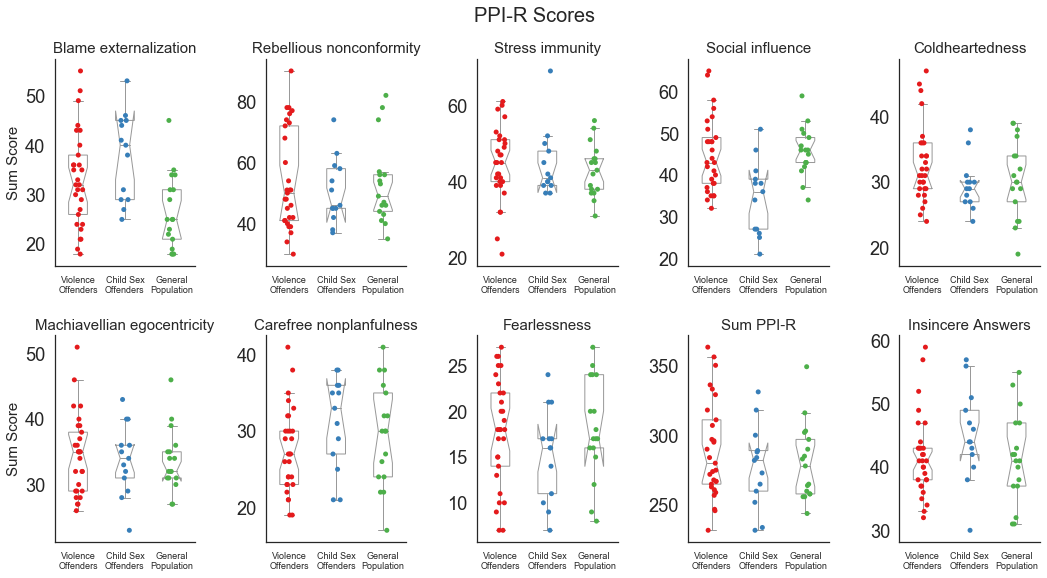

In [32]:
makeBoxPlot(ppiDf)

In [33]:
ppiDf.groupby("group").describe().T[[1,2,9,10,17,18]]

group                                 0                      1             \
                                   mean        std        mean        std   
Blame externalization         33.172414   9.606802   37.923077   8.836115   
Carefree nonplanfulness       27.551724   5.520004   31.153846   6.053183   
Coldheartedness               32.758621   5.841081   29.615385   3.819652   
Fearlessness                  17.827586   5.910457   15.384615   5.058631   
Insincere Answers             41.758621   6.456753   45.153846   7.278349   
Machiavellian egocentricity   34.620690   6.008410   33.846154   5.459642   
Rebellious nonconformity      54.310345  16.444937   50.538462  10.689679   
Social influence              44.827586   8.888472   34.538462   8.903327   
Stress immunity               44.517241   9.649651   44.538462   8.809232   
Sum PPI-R                    289.586207  34.983177  277.538462  29.452265   

group                                 2             
                                   mean        std  
Blame externalization         26.647059   7.565887  
Carefree nonplanfulness       29.647059   6.660904  
Coldheartedness               30.529412   5.917323  
Fearlessness                  18.176471   5.491303  
Insincere Answers             41.588235   7.141943  
Machiavellian egocentricity   33.647059   4.755801  
Rebellious nonconformity      53.000000  13.486104  
Social influence              45.588235   5.916701  
Stress immunity               43.000000   6.855655  
Sum PPI-R                    280.235294  27.148963

### Inferential statistics

In [34]:
makeUTests(ppiDf)

G > K               G > A               K > A  \
                                 U      p   sig      U      p   sig      U   
Blame externalization          132  0.127  n.s.    349   0.02     *  182.5   
Carefree nonplanfulness        120  0.064  n.s.  195.5  0.249  n.s.  124.5   
Coldheartedness              254.5  0.074  n.s.  284.5  0.392  n.s.     94   
Fearlessness                   241  0.156  n.s.  246.5  0.991  n.s.   78.5   
Insincere Answers            121.5   0.07  n.s.    249  0.964  n.s.  145.5   
Machiavellian egocentricity    193  0.913  n.s.    272  0.568  n.s.    121   
Rebellious nonconformity       203  0.703  n.s.  237.5  0.847  n.s.    102   
Social influence               294  0.004     *    220  0.553  n.s.     34   
Stress immunity                212  0.531  n.s.  285.5   0.38  n.s.    117   
Sum PPI-R                      219  0.414  n.s.  289.5  0.333  n.s.    108   

                                          
                                 p   sig  
Blame externalization        0.003     *  
Carefree nonplanfulness      0.571  n.s.  
Coldheartedness              0.501  n.s.  
Fearlessness                 0.185  n.s.  
Insincere Answers            0.148  n.s.  
Machiavellian egocentricity  0.674  n.s.  
Rebellious nonconformity     0.737  n.s.  
Social influence             0.001     *  
Stress immunity              0.801  n.s.  
Sum PPI-R                    0.933  n.s.

# SCID-II

In [35]:
scidDf = pd.read_csv('../experiment/scid_ii.csv',
                   index_col=[0,1])

scidDf = scidDf.replace(-99,np.nan)
scidDf = scidDf.dropna()
scidDf = scidDf[:-1]

In [36]:
scidDf.to_csv('../outputs/scidDf.csv')

In [37]:
scidDf.tail()

Avoidant  Dependent  OCD  Negativistic  Depressive  Paranoid  \
g id                                                                   
K K010         5          5    7             7           7         8   
  K011         1          0    3             0           0         1   
  K012         2          0    2             2           2         5   
  K013         4          6    5             0           3         4   
  K014         0          2    5             2           2         0   

        Schizotypal  Schizoid  Histrionic  Narcissitic  Borderline  \
g id                                                                 
K K010            7         4           0           11          10   
  K011            0         1           0            1           0   
  K012            7         1           0            2           3   
  K013            2         2           1            4           0   
  K014            0         0           0            0           0   

        Antisocial  group  
g id                       
K K010           7      1  
  K011           0      1  
  K012           0      1  
  K013           2      1  
  K014           0      1

In [38]:
def makeScidPlot(df):
    fig = plt.figure(figsize=(15,9))
    sns.set_style('ticks')

    sortDf = df.sort_values('group')
    
    myColumns = df.columns[:-1]
    numColumns = len(myColumns)
    
    for i,metric in enumerate(myColumns):

        ax = fig.add_subplot(3,4,i+1)

        sns.boxplot(x='group',y=metric,data=sortDf,
                    width=0.4,linewidth=1,color='white',whis=True,notch=True,fliersize=0,ax=ax)

        sns.stripplot(x='group', y=metric, data=sortDf,
                      jitter=True, edgecolor='white',palette=myPal,ax=ax)

        ax.set_title(metric)

        ax.set_xticklabels(['Violence\nOffenders','Child Sex\nOffenders','General\nPopulation'],fontsize=9)
        ax.set_xlabel('')
        if i%4 ==  0: 
            ax.set_ylabel('Sum Score',fontsize=15)
        else:
            ax.set_ylabel('')
        #ax.set_ylim(-0.2,4)
        sns.despine()
    plt.suptitle('SCID-II',fontsize=20, position=(0.51,1.02))
    # save to file
    #plt.savefig('../figures/afasFig.png',dpi=300) 
    # show in notebook
    plt.tight_layout()
    plt.show()

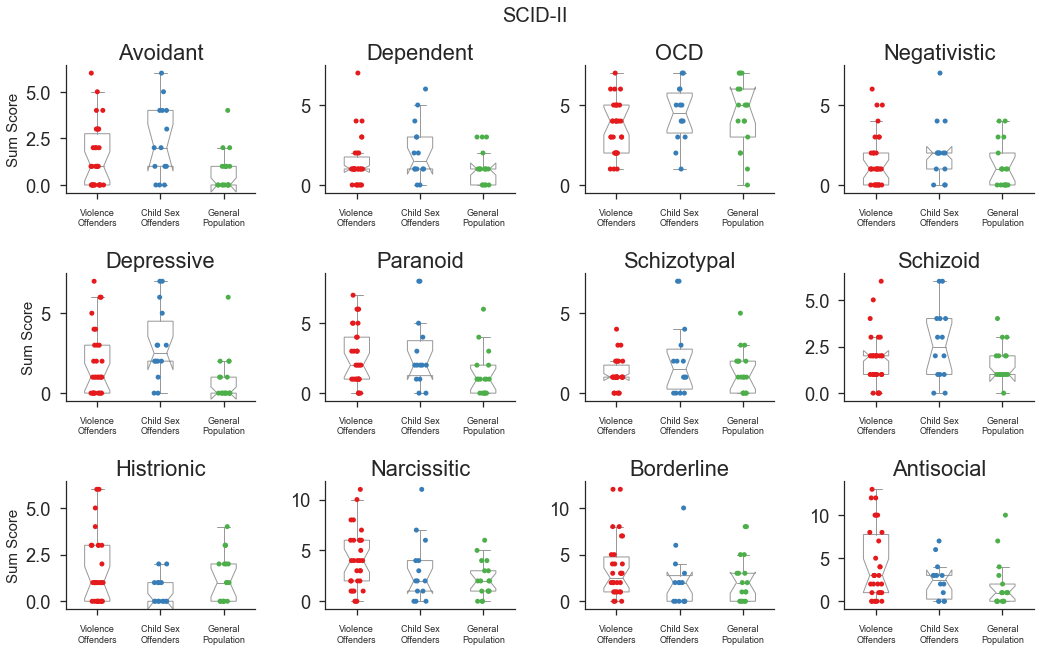

In [39]:
makeScidPlot(scidDf)

In [40]:
scidDf.groupby("group").describe().T[[1,2,9,10,17,18]]

group                0                   1                   2          
                  mean       std      mean       std      mean       std
Antisocial    4.233333  4.190986  2.428571  2.208873  1.823529  2.811479
Avoidant      1.500000  1.696853  2.357143  1.984833  0.764706  1.091410
Borderline    3.533333  3.234868  2.214286  2.887069  2.470588  2.648529
Dependent     1.400000  1.522249  2.142857  1.833750  1.117647  1.053705
Depressive    1.833333  2.069205  3.071429  2.335818  0.882353  1.536325
Histrionic    1.600000  1.811838  0.571429  0.755929  1.411765  1.325652
Narcissitic   4.000000  2.936101  3.071429  3.149219  2.176471  1.776066
Negativistic  1.566667  1.675036  2.071429  1.899971  1.235294  1.437420
OCD           3.600000  1.631585  4.428571  1.785165  4.294118  2.114377
Paranoid      2.566667  2.095699  2.857143  2.567763  1.352941  1.656094
Schizoid      1.800000  1.423933  2.642857  1.984833  1.588235  1.003670
Schizotypal   1.233333  0.935261  2.142857  2.381245  1.411765  1.371989

### inferential statistics

In [41]:
makeUTests(scidDf)

G > K               G > A               K > A             
                  U      p   sig      U      p   sig      U      p   sig
Antisocial    250.5  0.308  n.s.    355  0.025     *  147.5  0.252  n.s.
Avoidant        154  0.151  n.s.    314  0.171  n.s.  177.5  0.016     *
Borderline    273.5  0.108  n.s.  309.5  0.227  n.s.  107.5  0.653  n.s.
Dependent     155.5   0.15  n.s.    275  0.642  n.s.    159    0.1  n.s.
Depressive      137  0.063  n.s.  331.5  0.077  n.s.    194  0.002     *
Histrionic      279  0.069  n.s.    256  0.991  n.s.     76  0.074  n.s.
Narcissitic   255.5  0.253  n.s.  349.5  0.036     *    132  0.615  n.s.
Negativistic  169.5    0.3  n.s.  285.5   0.49  n.s.  153.5  0.164  n.s.
OCD           152.5  0.145  n.s.    195  0.182  n.s.    120  0.984  n.s.
Paranoid      198.5  0.778  n.s.  348.5  0.035     *    169  0.044     *
Schizoid      158.5  0.188  n.s.    274  0.669  n.s.    155  0.144  n.s.
Schizotypal   178.5  0.408  n.s.    246  0.841  n.s.  133.5  0.568  n.s.